# Importing lib

In [79]:
# Task1 Importing Lib
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
sns.set()

# Extracting features  

In [4]:
# Loading Dataset
iris=datasets.load_iris()

In [5]:
# Performing Extraction  
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [6]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [7]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [8]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [9]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [10]:
x=iris.data
y=iris.target

In [11]:
x.shape

(150, 4)

In [12]:
y.shape

(150,)

# DATAFRAME
We are going to create a dataframe using panda's as it is simplier to access 
before moving onto classification we are going to perform some interactive session with our code by displaying themm using matplotlib

In [13]:
df=pd.DataFrame(iris["data"],columns=iris["feature_names"])

In [14]:
df["target"]=iris["target"]

In [15]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


<AxesSubplot:>

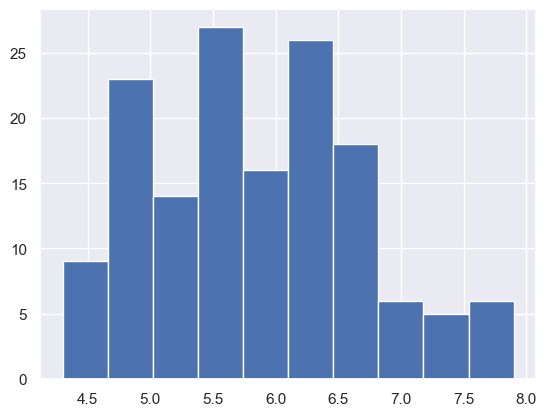

In [16]:
df["sepal length (cm)"].hist()

<AxesSubplot:>

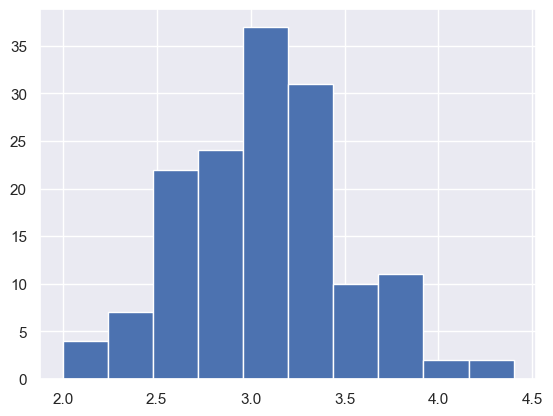

In [17]:
df["sepal width (cm)"].hist()

<AxesSubplot:>

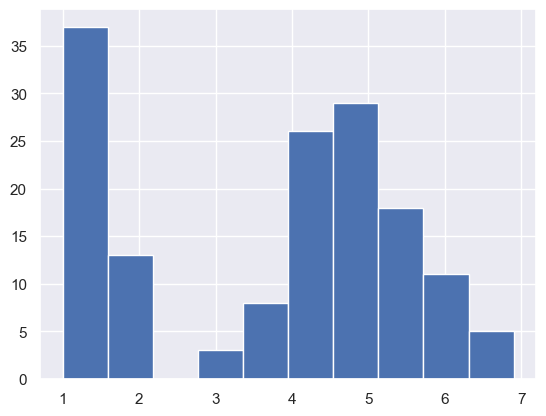

In [18]:
df["petal length (cm)"].hist()

<AxesSubplot:>

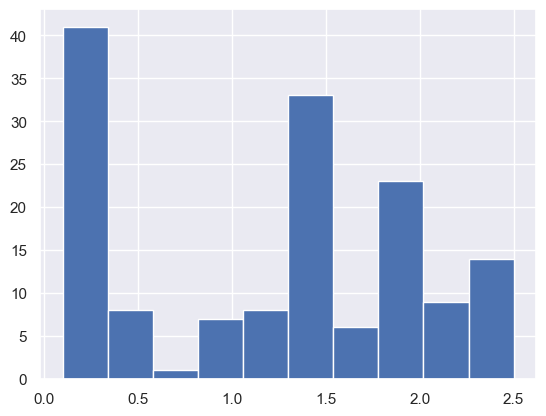

In [19]:
df["petal width (cm)"].hist()

Enhancing the features of the histogram 

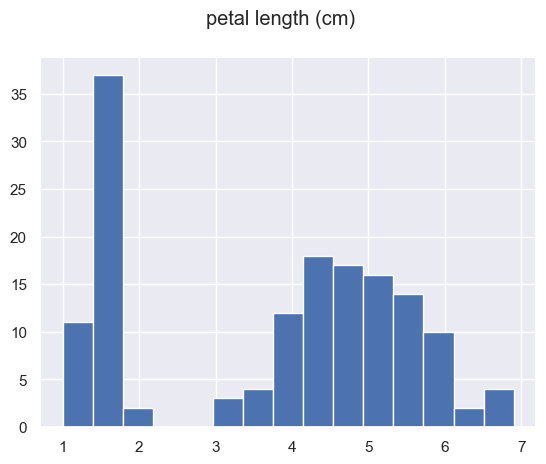

In [20]:
col="petal length (cm)"
df[col].hist(bins=15)
plt.suptitle(col)
plt.show()

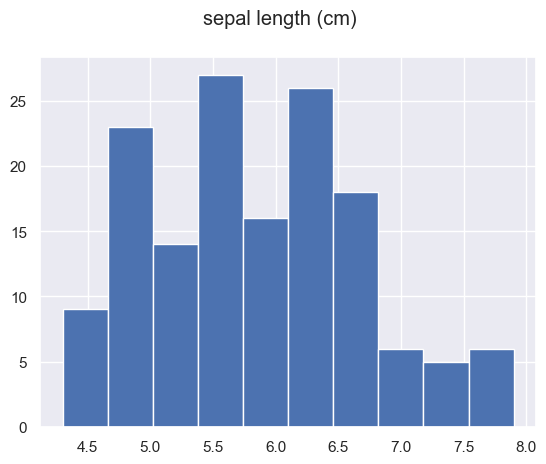

In [21]:
col="sepal length (cm)"
df[col].hist(bins=10)
plt.suptitle(col)
plt.show()

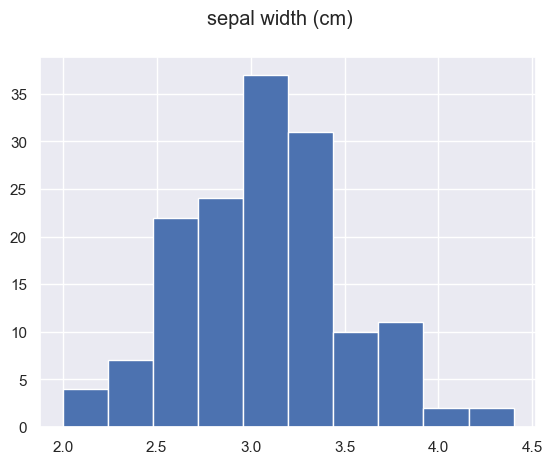

In [22]:
col="sepal width (cm)"
df[col].hist()
plt.suptitle(col)
plt.show()

# Relation between the target and the features 
-sns relplot is used to form a relationship between the features and target
-sns relplot consist of the following attributes such as mentioning x input and y output 
-here x is col and y is target whereas hue is consist of the name of the targets 

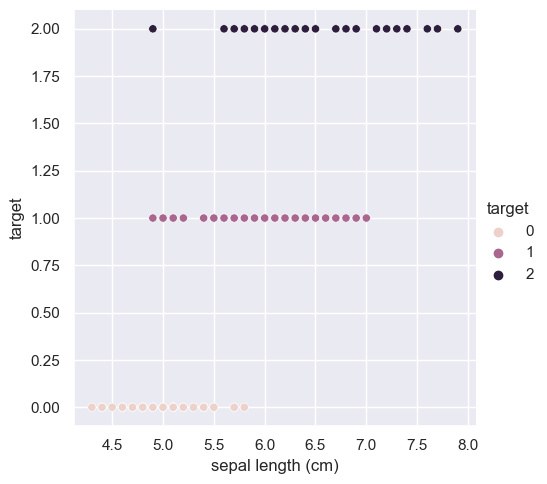

In [23]:
col="sepal length (cm)"
sns.relplot(x=col,y="target",hue="target",data=df)

now lets try to add some names into the plot to make it more recogonizable

In [75]:
df["target_names"]

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: target_names, Length: 150, dtype: object

Now map the target_names to sns

Text(0.5, 1, 'sepal length (cm)')

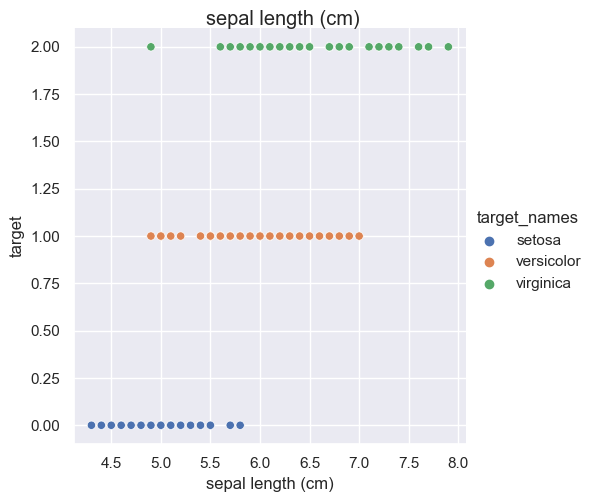

In [25]:
df["target_names"]=df["target"].map({0:"setosa",1:"versicolor",2:"virginica"})
col="sepal length (cm)"
sns.relplot(x=col,y="target",hue="target_names",data=df)
plt.suptitle(col,y=1)

Now the plot is much more clear ,lets try other features using the same method

Text(0.5, 0.98, 'sepal width (cm)')

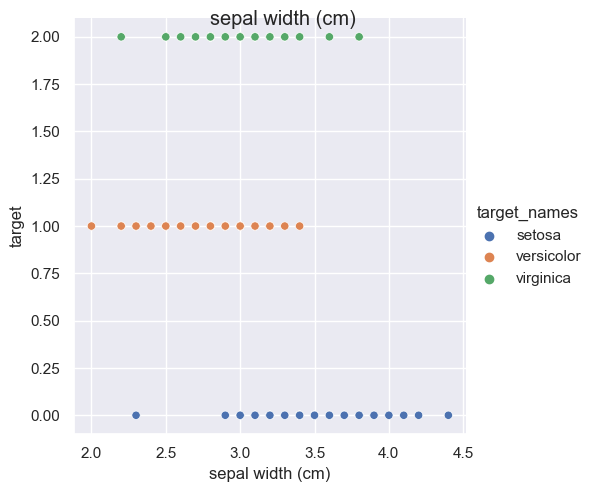

In [26]:
col="sepal width (cm)"
sns.relplot(x=col,y="target",hue="target_names",data=df)
plt.suptitle(col)

Text(0.5, 0.98, 'petal length (cm)')

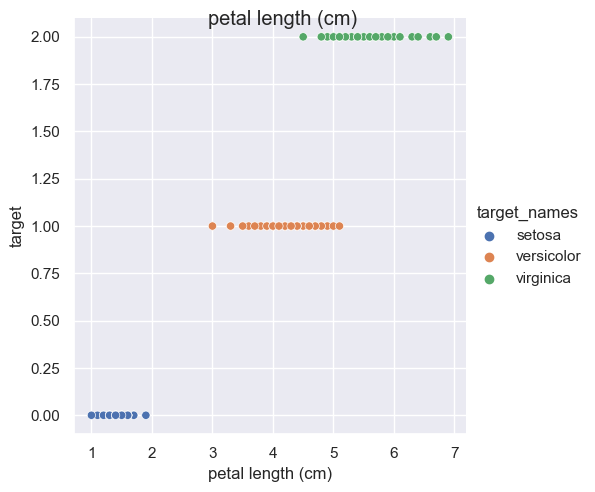

In [27]:
col="petal length (cm)"
sns.relplot(x=col,y="target",hue="target_names",data=df)
plt.suptitle(col)

Text(0.5, 0.98, 'petal width (cm)')

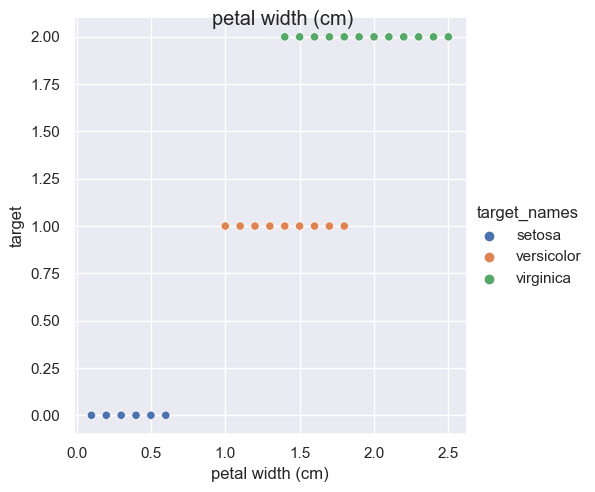

In [28]:
col="petal width (cm)"
sns.relplot(x=col,y="target",hue="target_names",data=df)
plt.suptitle(col)

# EDA ANALYSIS
lets try to plot each input with the targeted output 
- In the below sequence we can bring out the insights into greater fraction of details by bring ploting each of the input that is consisted in each feature to the targeted output y 
- This analysis constitutes distribution and difference with respect to each input

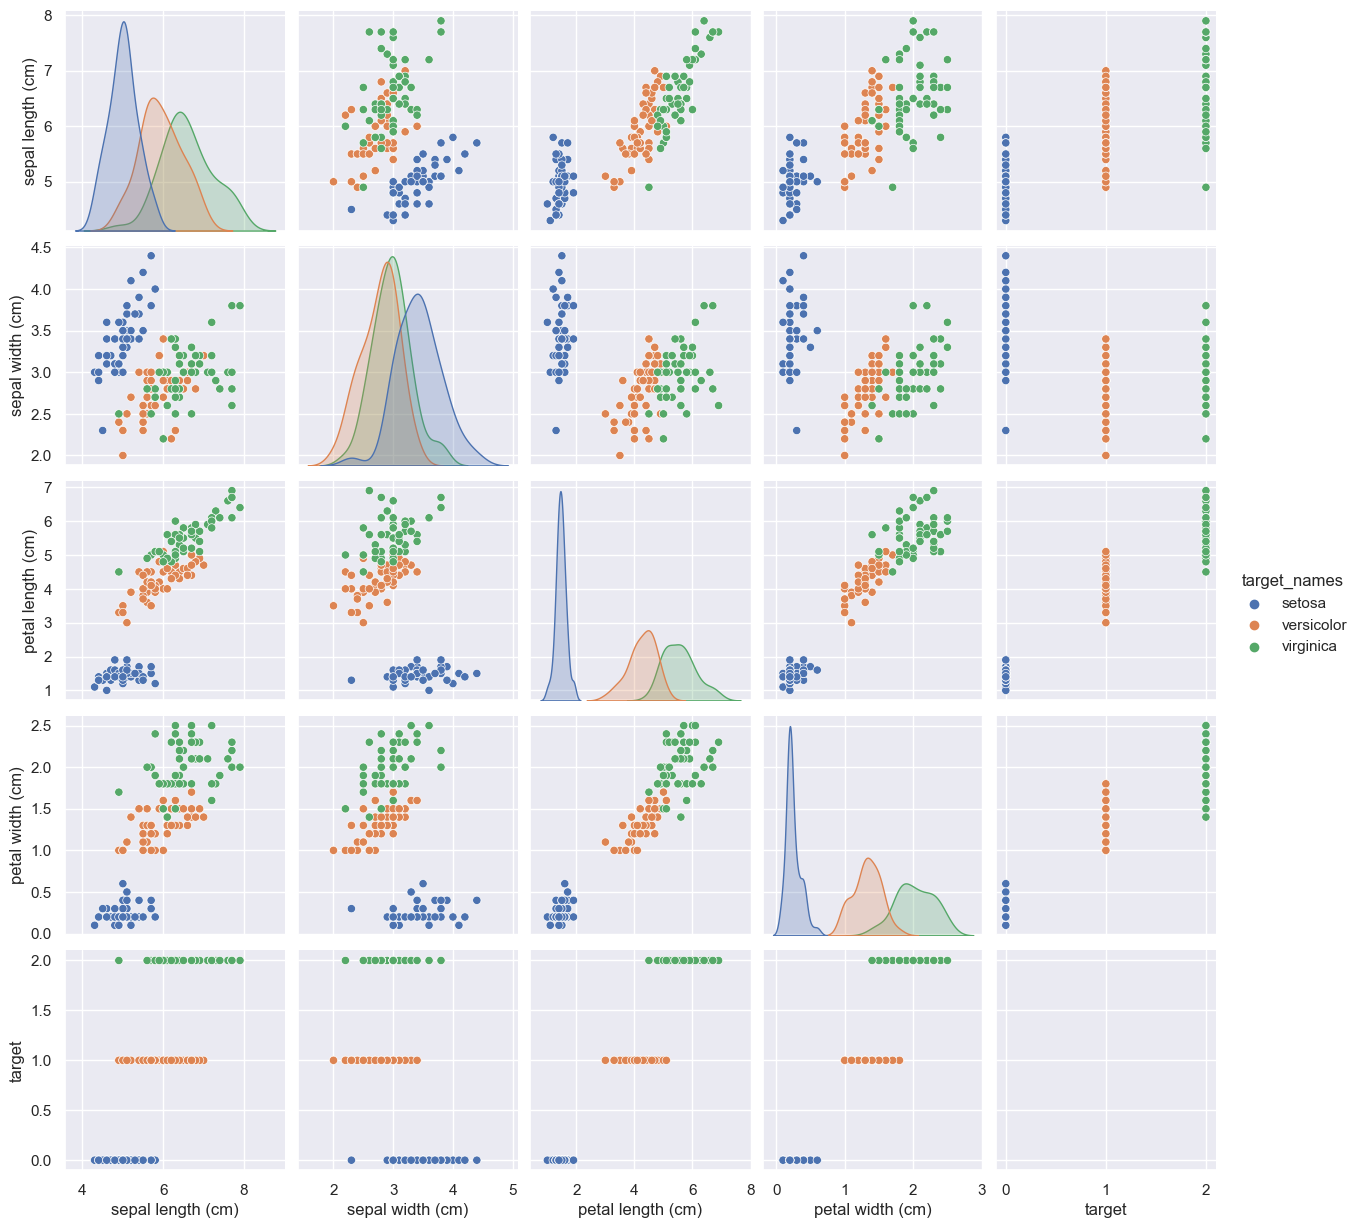

In [29]:
sns.pairplot(df,hue="target_names")

# RANDOMFORESTCLASSIFICATION ALGORITHM
- Instead of logistic regression i would like to try this dataset with randomforest classfication 
- Although this dataset is a linear text dataset random classification constitutes greater insights obtained from the prediction.

In [30]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier()
clf.fit(x,y)
clf.score(x,y)

1.0

In [31]:
print(clf.feature_importances_)
x[0]

[0.09432811 0.02396333 0.45205018 0.42965838]


array([5.1, 3.5, 1.4, 0.2])

In [32]:
print(clf.predict([[5.1, 3.5, 1.4, 0.2]]))
print(clf.predict_proba(x[[0]]))
print(clf.fit(iris.data,iris.target_names[iris.target]))

[0]
[[1. 0. 0.]]
RandomForestClassifier()


#

# DATA SPLITING 
Data will be splitted into 80 by 20 
which  will consist of x_train,y_train and x_test,y_test

In [33]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
x_train.shape,y_train.shape

((120, 4), (120,))

# Sample dataset single prediction

In [34]:
clf.fit(x_train,y_train)
print(clf.predict([[5.1, 3.5, 1.4, 0.2]]))
print(clf.predict_proba([[5.1, 3.5, 1.4, 0.2]]))

[0]
[[1. 0. 0.]]


In [35]:
print(clf.predict(x_test)) #predicted class labels

[1 0 0 0 0 0 1 2 0 1 0 0 1 0 1 1 1 1 2 0 2 2 1 2 0 2 0 1 1 1]


In [36]:
#actual class labels
print(y_test)

[1 0 0 0 0 0 2 2 0 1 0 0 1 0 1 1 1 1 2 0 2 2 1 2 0 2 0 1 1 1]


# PERFORMANCE

In [37]:
print(clf.score(x_test,y_test))

0.9666666666666667


# Cross Validation
- In EDA and through classification we can conclude that we have trained a single model 
- Cross validation talks about repeating the same procedure again and again to obtain trained models for all the other untrained   models 
- We can obtain them by taking one trained model and rest of them as 4 chunks 

In [90]:
df_train,df_test=train_test_split(df,test_size=0.2)
df_train.head()
df_test.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
85,6.0,3.4,4.5,1.6,1,versicolor
145,6.7,3.0,5.2,2.3,2,virginica
79,5.7,2.6,3.5,1.0,1,versicolor
12,4.8,3.0,1.4,0.1,0,setosa
70,5.9,3.2,4.8,1.8,1,versicolor


In [39]:
from sklearn.model_selection import cross_val_score,cross_val_predict

In [40]:
model=RandomForestClassifier()

In [41]:
accuracy=cross_val_score(model,x_train,y_train,cv=5,scoring='accuracy')

In [42]:
np.mean(accuracy)

0.9583333333333334

In [43]:
y_pred=cross_val_predict(model,x_train,y_train,cv=5)

In [44]:
y_pred

array([2, 1, 0, 1, 0, 1, 2, 2, 2, 0, 2, 1, 1, 2, 0, 2, 0, 2, 2, 2, 0, 1,
       0, 2, 1, 2, 0, 1, 1, 2, 0, 1, 1, 1, 1, 2, 2, 1, 0, 1, 1, 0, 1, 2,
       0, 0, 2, 1, 2, 0, 0, 1, 0, 0, 0, 2, 0, 2, 1, 2, 2, 1, 0, 1, 0, 0,
       0, 2, 2, 0, 1, 2, 1, 1, 1, 1, 2, 2, 0, 1, 1, 2, 0, 1, 2, 1, 1, 1,
       0, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0, 1, 2, 0, 2, 0, 0, 1, 2, 1, 0, 2,
       1, 2, 2, 0, 0, 0, 2, 0, 2, 1])

In [45]:
predictedmodel=y_pred==y_train

In [46]:
x_train[predictedmodel]

array([[6.3, 3.3, 6. , 2.5],
       [5.7, 2.8, 4.1, 1.3],
       [4.8, 3.1, 1.6, 0.2],
       [5.6, 2.5, 3.9, 1.1],
       [5.1, 3.5, 1.4, 0.3],
       [5.6, 2.7, 4.2, 1.3],
       [7.2, 3. , 5.8, 1.6],
       [6.7, 3.1, 5.6, 2.4],
       [7.2, 3.6, 6.1, 2.5],
       [5. , 3.2, 1.2, 0.2],
       [6.4, 2.8, 5.6, 2.1],
       [5.6, 3. , 4.1, 1.3],
       [5. , 2. , 3.5, 1. ],
       [6. , 3. , 4.8, 1.8],
       [5.4, 3.4, 1.5, 0.4],
       [7.7, 3. , 6.1, 2.3],
       [5.4, 3.7, 1.5, 0.2],
       [7.3, 2.9, 6.3, 1.8],
       [6.4, 3.2, 5.3, 2.3],
       [6.7, 2.5, 5.8, 1.8],
       [5.4, 3.9, 1.3, 0.4],
       [6.6, 3. , 4.4, 1.4],
       [4.4, 3.2, 1.3, 0.2],
       [6.1, 2.9, 4.7, 1.4],
       [6.3, 2.5, 5. , 1.9],
       [4.4, 2.9, 1.4, 0.2],
       [5.8, 2.7, 4.1, 1. ],
       [5.7, 2.9, 4.2, 1.3],
       [6.3, 2.9, 5.6, 1.8],
       [5. , 3.4, 1.6, 0.4],
       [5.8, 2.7, 3.9, 1.2],
       [6.1, 3. , 4.6, 1.4],
       [7. , 3.2, 4.7, 1.4],
       [5.7, 2.8, 4.5, 1.3],
       [6.3, 2

In [47]:
notpredictedmodel=~predictedmodel

In [48]:
x_train[notpredictedmodel]

array([[6.7, 3. , 5. , 1.7],
       [6. , 2.2, 5. , 1.5],
       [6.3, 2.8, 5.1, 1.5],
       [6. , 2.7, 5.1, 1.6],
       [5.9, 3.2, 4.8, 1.8]])

In [49]:
x_train

array([[6.3, 3.3, 6. , 2.5],
       [5.7, 2.8, 4.1, 1.3],
       [4.8, 3.1, 1.6, 0.2],
       [5.6, 2.5, 3.9, 1.1],
       [5.1, 3.5, 1.4, 0.3],
       [5.6, 2.7, 4.2, 1.3],
       [7.2, 3. , 5.8, 1.6],
       [6.7, 3.1, 5.6, 2.4],
       [7.2, 3.6, 6.1, 2.5],
       [5. , 3.2, 1.2, 0.2],
       [6.4, 2.8, 5.6, 2.1],
       [5.6, 3. , 4.1, 1.3],
       [5. , 2. , 3.5, 1. ],
       [6. , 3. , 4.8, 1.8],
       [5.4, 3.4, 1.5, 0.4],
       [7.7, 3. , 6.1, 2.3],
       [5.4, 3.7, 1.5, 0.2],
       [7.3, 2.9, 6.3, 1.8],
       [6.4, 3.2, 5.3, 2.3],
       [6.7, 2.5, 5.8, 1.8],
       [5.4, 3.9, 1.3, 0.4],
       [6.6, 3. , 4.4, 1.4],
       [4.4, 3.2, 1.3, 0.2],
       [6.7, 3. , 5. , 1.7],
       [6.1, 2.9, 4.7, 1.4],
       [6.3, 2.5, 5. , 1.9],
       [4.4, 2.9, 1.4, 0.2],
       [5.8, 2.7, 4.1, 1. ],
       [5.7, 2.9, 4.2, 1.3],
       [6.3, 2.9, 5.6, 1.8],
       [5. , 3.4, 1.6, 0.4],
       [5.8, 2.7, 3.9, 1.2],
       [6.1, 3. , 4.6, 1.4],
       [7. , 3.2, 4.7, 1.4],
       [5.7, 2

In [50]:
df_prediction=df_train.copy()# we need to make sure that the y_train==y_pred where every chunk must be true for an absolute prediction 

In [51]:
df_train.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
71,6.1,2.8,4.0,1.3,1,versicolor
134,6.1,2.6,5.6,1.4,2,virginica
63,6.1,2.9,4.7,1.4,1,versicolor
58,6.6,2.9,4.6,1.3,1,versicolor
116,6.5,3.0,5.5,1.8,2,virginica


In [52]:
df_prediction["corrected prediction"]=predictedmodel#the corrected model must contain a true value to make sure that they are trained well

In [53]:
df_prediction['predictions']=y_pred # here the predicted values are shown

In [54]:
df_prediction['labeled_prediction']=df_prediction['predictions'].map({0:"setosa",1:"versicolor",2:"virginica"})#map the predicted values with each of the targeted models 

In [55]:
df_prediction.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names,corrected prediction,predictions,labeled_prediction
71,6.1,2.8,4.0,1.3,1,versicolor,True,2,virginica
134,6.1,2.6,5.6,1.4,2,virginica,True,1,versicolor
63,6.1,2.9,4.7,1.4,1,versicolor,True,0,setosa
58,6.6,2.9,4.6,1.3,1,versicolor,True,1,versicolor
116,6.5,3.0,5.5,1.8,2,virginica,True,0,setosa


# SCATTER PLOT OF THE TRAINED MODELS AND THERE VALUES 

Text(0.5, 0.98, 'PREDICTION OF THE TRAINED MODELS')

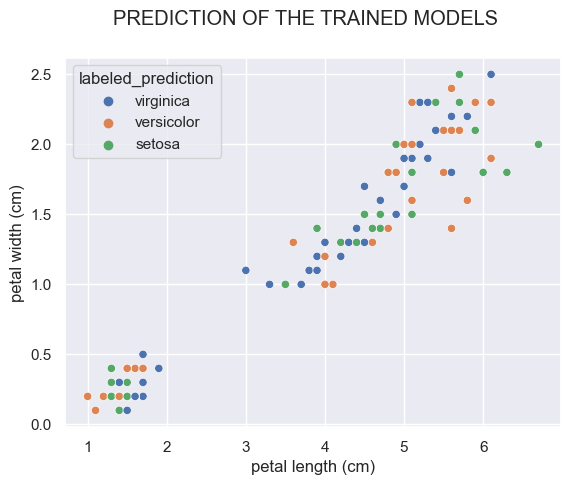

In [56]:
sns.scatterplot(x="petal length (cm)",y="petal width (cm)",hue="labeled_prediction",data=df_prediction)
plt.suptitle("PREDICTION OF THE TRAINED MODELS")
# below we can see that the 

Text(0.5, 0.98, 'TARGET VALUES')

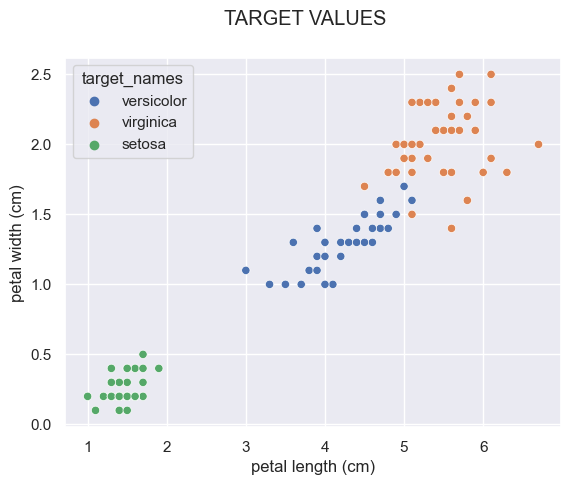

In [57]:
sns.scatterplot(x="petal length (cm)",y="petal width (cm)",hue="target_names",data=df_prediction)
plt.suptitle("TARGET VALUES")
# the virginica and versicolor is now more accurate than during the pair plots which we have performed
# from this we are going to obtain the false values which doesn't match the y_prediction
#by intializing a function we can make sure thta the mismatched values can be corrected .

In [58]:
def incorrected_prediction(df_prediction, x_axis_feature, y_axis_feature):
    fig,axis=plt.subplots(2,2,figsize=(10,10))
    axis=axis.flatten()
    sns.scatterplot(x=x_axis_feature,y=y_axis_feature,hue="labeled_prediction",data=df_prediction,ax=axis[0])
    sns.scatterplot(x=x_axis_feature,y=y_axis_feature,hue="target_names",data=df_prediction,ax=axis[1])
    sns.scatterplot(x=x_axis_feature,y=y_axis_feature,hue="corrected prediction",data=df_prediction,ax=axis[2])
    axis[3].set_visible(False)
    plt.show()

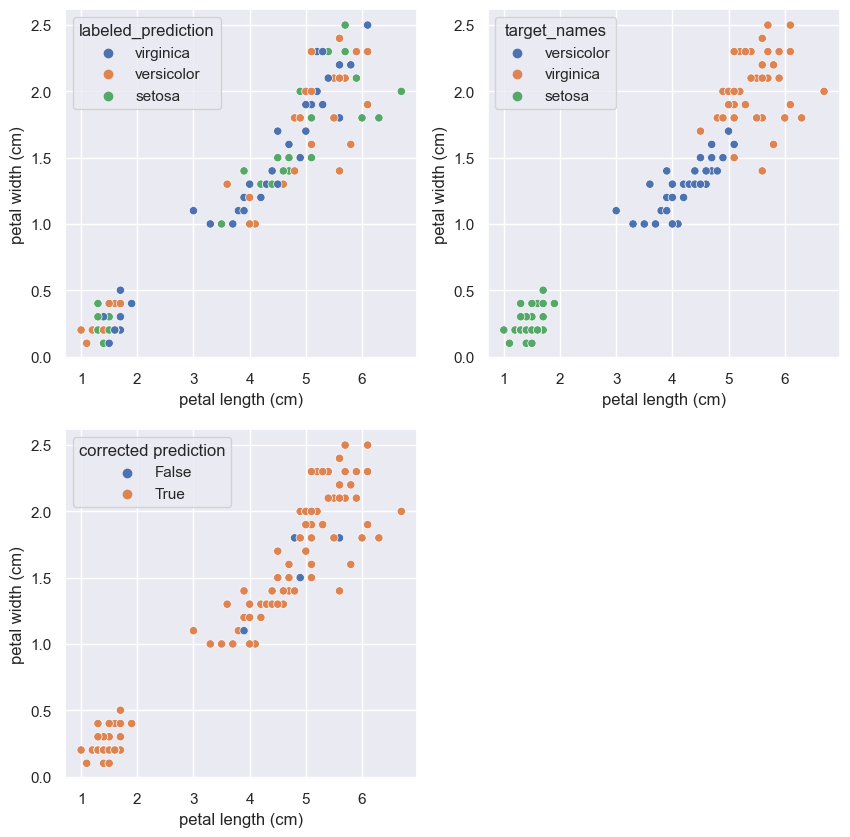

In [59]:
incorrected_prediction(df_prediction, "petal length (cm)","petal width (cm)")

# MODEL TUNING


In [81]:
for reg_param in(1,1.8,1.3,2,2.3,2.9,3):
    print(reg_param)
    clf=LogisticRegression(max_iter=200,C=reg_param)
    accuracy=cross_val_score(clf,x_train,y_train,cv=5,scoring='accuracy')
    print(f"Accuracy:{np.mean(accuracy)*100:.2f}%")

1
Accuracy:95.83%
1.8
Accuracy:95.83%
1.3
Accuracy:95.83%
2
Accuracy:95.83%
2.3
Accuracy:95.83%
2.9
Accuracy:95.83%
3
Accuracy:95.83%


### FINAL MODEL

-USING A LOGISTIC REGRESSION

In [83]:
model=LogisticRegression(max_iter=200,C=2)

In [93]:
x_test =df_test.drop(columns=["target","target_names"]).values
y_test =df_test['target'].values

### TRAINING OUR FINAL MODEL

In [114]:
model=RandomForestClassifier()
model.fit(x_train,y_train)
y_test_prod=model.predict(x_test)

In [116]:
test_set_correctly_classified=y_test_prod==y_test
test_set_accuracy=np.mean(test_set_correctly_classified)

In [112]:
print(f"test set accuracy:{test_set_accuracy*100:.2f}")

test set accuracy:96.67


logistic regression produce an accuracy of 93.3% 
while randomforestclassifier produce an accuracy of 96.67%

In [113]:
test_set_correctly_classified

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [117]:
df_prediction_test=df_test.copy()# we need to make sure that the y_train==y_pred where every chunk must be true for an absolute predictio
df_prediction_test["corrected prediction"]=test_set_correctly_classified#the corrected model must contain a true value to make sure that they are trained well
df_prediction_test['predictions']=y_test_prod # here the predicted values are shown
df_prediction_test['labeled_prediction']=df_prediction_test['predictions'].map({0:"setosa",1:"versicolor",2:"virginica"})

In [118]:
df_prediction_test.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names,corrected prediction,predictions,labeled_prediction
85,6.0,3.4,4.5,1.6,1,versicolor,True,1,versicolor
145,6.7,3.0,5.2,2.3,2,virginica,True,2,virginica
79,5.7,2.6,3.5,1.0,1,versicolor,True,1,versicolor
12,4.8,3.0,1.4,0.1,0,setosa,True,0,setosa
70,5.9,3.2,4.8,1.8,1,versicolor,True,1,versicolor


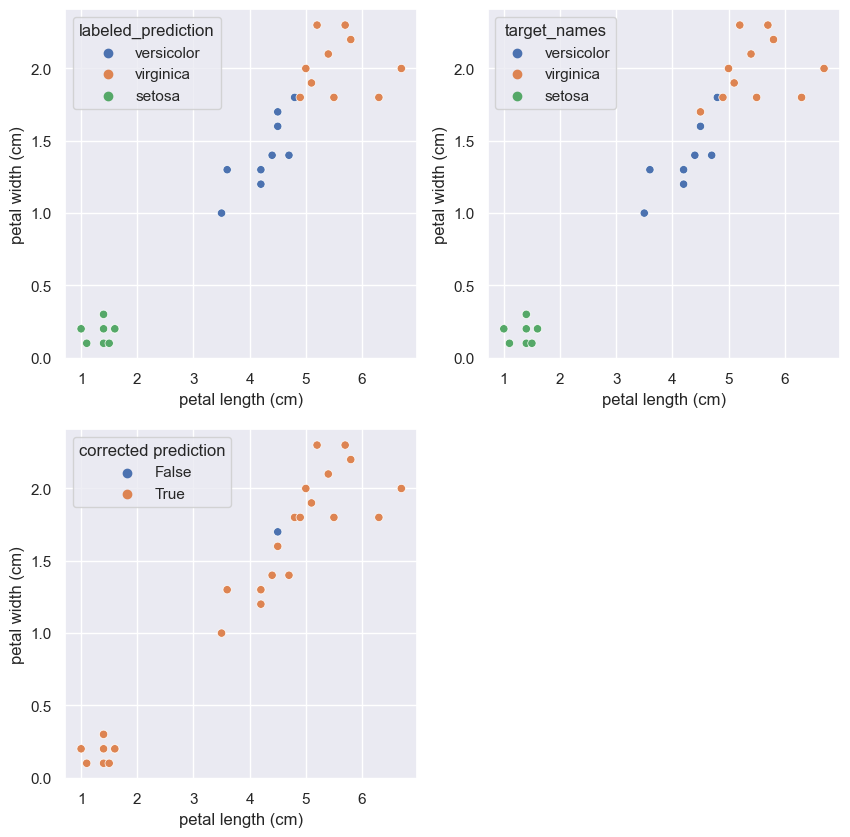

In [119]:
incorrected_prediction(df_prediction_test, x_axis_feature="petal length (cm)",y_axis_feature="petal width (cm)")

### IN CONCLUSION 
We have achieved a 97% of accuracy on our data set using RandomForestClassifier here we can also see that there is only one false prediction which is quite low and the accuracy is perfect 

thank you !